# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Data Overview

### Importing necessary libraries and data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling the data using z-score normalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, PowerTransformer

# Import the train_test_split function for splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# Machine learning algorithms to be used for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, accuracy_score
from sklearn import tree

# Tools for tuning the model's hyperparameters
from sklearn.model_selection import GridSearchCV

# To check for skewness in the data
from scipy.stats import skew
from scipy import stats

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


####Reading from Data into Dataframe

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
unprocessed_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework/Potential Customers Homework/ExtraaLearn.csv")
unprocessed_df.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)


#### Univariate Analysis

In [51]:
cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']
for i in cols:
    print(unprocessed_df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

**Observations:**

- Over 56% of the leads are professionals, while 31% are unemployed, and 12% are students. This indicates a strong interest from working professionals but also a significant segment of unemployed individuals seeking opportunities.

- Around 55% of the leads first interacted with ExtraaLearn via the website, while 45% used the mobile app. This suggests that both platforms play a significant role in initial customer engagement.

- Approximately 49% of leads have a "High" (75-100%) profile completion level, and 48% have a "Medium" (50-75%) level, while only 2% fall in the "Low" (0-50%) category. This demonstrates strong engagement and successful onboarding for the majority of leads.

- Nearly 49% of leads had their last activity categorized as Email Activity, 27% as Phone Activity, and 24% as Website Activity, indicating that email remains the most common channel for recent interactions.

- Around 11% of leads reported seeing ExtraaLearn ads in newspapers, while 5% reported exposure through magazines. This indicates that print media has a limited reach compared to other channels.

- Around 11% of leads reported seeing ExtraaLearn ads on digital platforms, showcasing the potential for greater outreach in the digital space.

- Around 15% of leads heard about ExtraaLearn through educational forums or websites, highlighting the effectiveness of this niche marketing channel.

- Only 2% of leads were referred to ExtraaLearn through personal recommendations, suggesting that referrals may not currently be a significant driver of engagement.

- Around 70% of leads did not convert (status = 0), while 30% of the leads successfully converted (status = 1). This indicates a need to further analyze what factors are driving conversions.





#### Bivariate Analysis

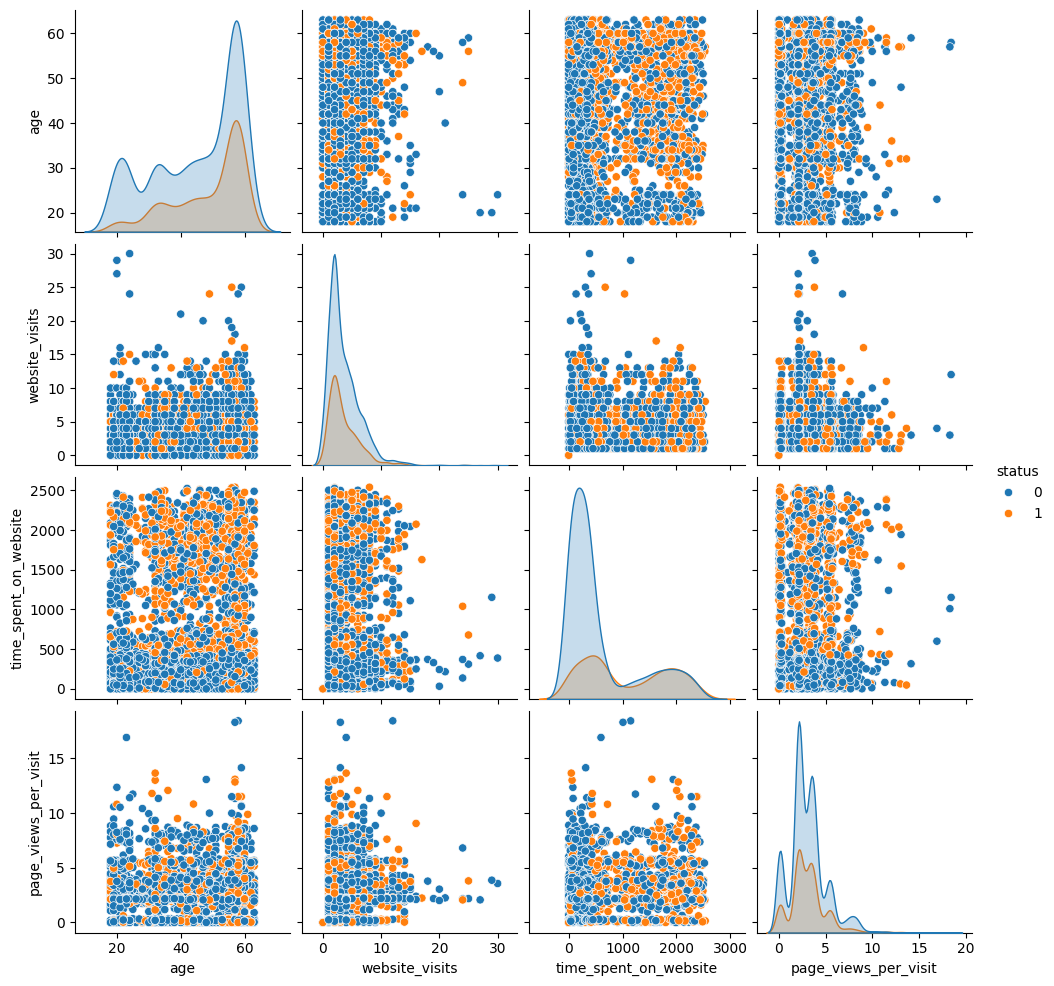

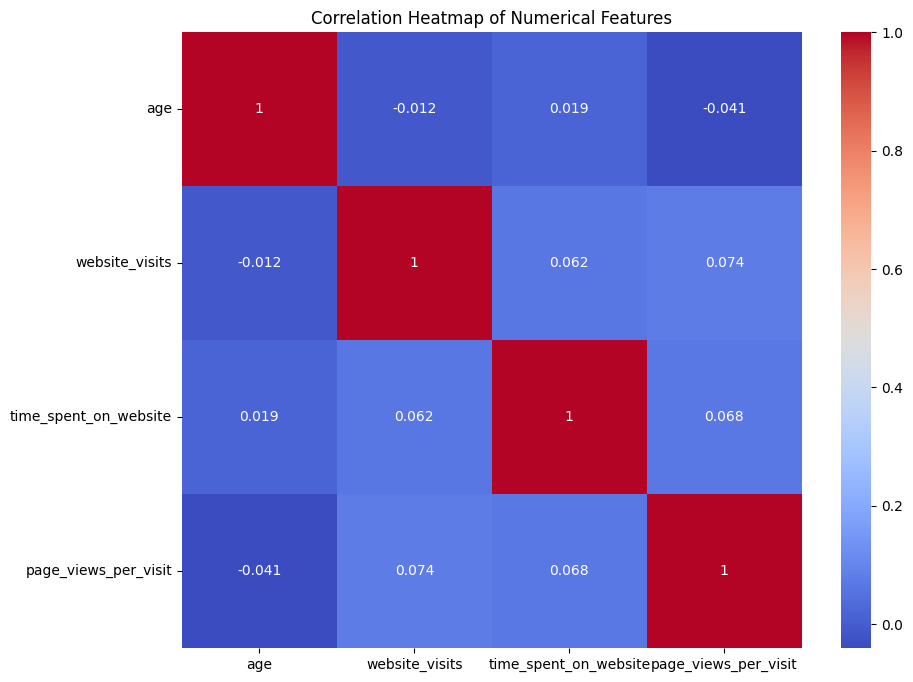

In [52]:
# Bivariate Analysis for selected features

# Numerical vs. Numerical
sns.pairplot(unprocessed_df,
             vars=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit'],
             hue='status',)
plt.show()

# A heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(unprocessed_df[['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observations:**

- The age dispersion of ExtraaLearn's leads is skewed towards the older demographic, with a significant concentration of individuals in their 50s and 60s for both paying and non-paying customers.

- The distribution of the number of visits to ExtraaLearn's website is left-skewed, indicating that most leads have made a relatively small number of visits for both paying and non-paying customers.

- Time spent on the website is skewed lower for non-paying customers but more uniformly distributed for paying customers, suggesting longer engagement correlates with higher conversion rates.

- The pattern of the average number of pages viewed per visit is left-skewed, indicating a predominance of lower average page views per visit for both paying and non-paying customers.

- The analysis reveals a lack of correlation between any of the numerical variables, indicating that changes in one variable do not predictably relate to changes in another within the dataset.

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

status                 0    1
current_occupation           
Professional        1687  929
Student              490   65
Unemployed          1058  383 

status                  0      1
current_occupation              
Professional        64.49  35.51
Student             88.29  11.71
Unemployed          73.42  26.58


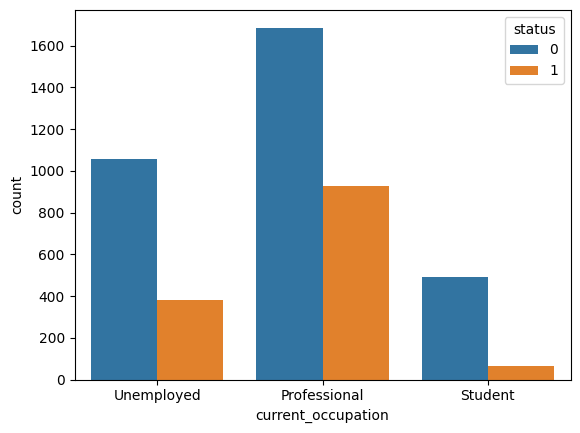

In [53]:
# Check the relationship between current occupation and lead status
counts = unprocessed_df.groupby(['current_occupation', 'status']).size().unstack()
print(counts, "\n")

# Convert count into percentage values
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)
print(percentages)
# # Visualize the relationship
sns.countplot(x='current_occupation', hue='status', data=unprocessed_df)
plt.show()

**Observations:**

- "Professionals" make up the majority of leads and have the highest conversion rate at approximately 36%.
- "Unemployed" leads are the second largest group and have the second highest conversion rate at 27%.
- "Students" represent the smallest group and have the lowest conversion rate at approximately 12%.


2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?


status                0     1
first_interaction            
Mobile App         1852   218
Website            1383  1159 

status                 0      1
first_interaction              
Mobile App         89.47  10.53
Website            54.41  45.59


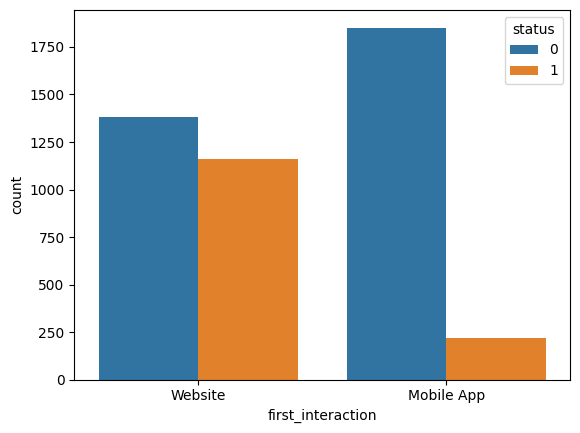

In [54]:
# Check the relationship between first_interaction and lead status
counts = unprocessed_df.groupby(['first_interaction', 'status']).size().unstack()
print(counts, "\n")

# Convert count into percentage values
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)
print(percentages)

# Visualize the relationship
sns.countplot(x='first_interaction', hue='status', data=unprocessed_df)
plt.show()

**Observations:**

- ExtraaLearn's website accounts for a slight majority of initial interactions and converts around 46% of leads into paid customers.
- ExtraaLearn's mobile app accounts for a slight minority of initial interactions and converts only 11% of leads into paid customers.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?


status               0    1
last_activity              
Email Activity    1587  691
Phone Activity     971  263
Website Activity   677  423 

status                0      1
last_activity                 
Email Activity    69.67  30.33
Phone Activity    78.69  21.31
Website Activity  61.55  38.45


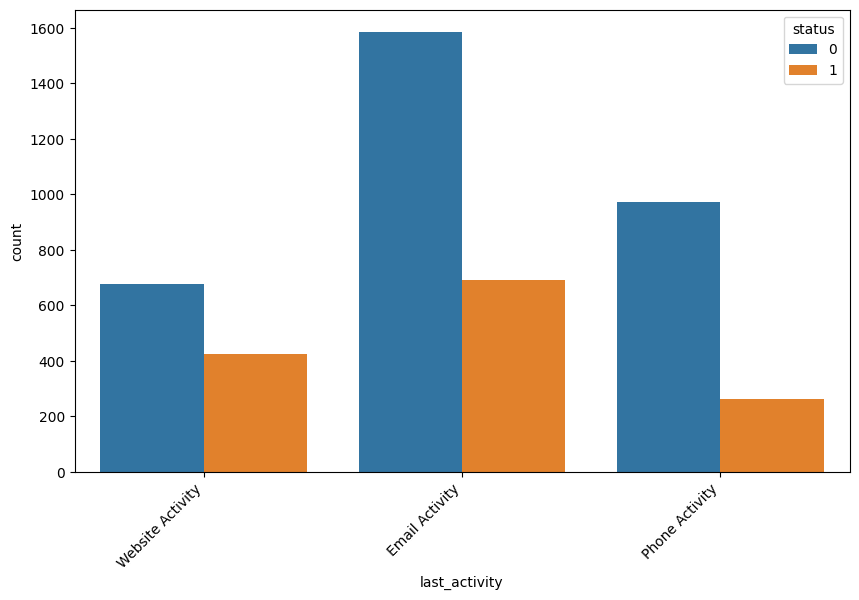

In [55]:
# Check the relationship between last_activity and lead status
counts = unprocessed_df.groupby(['last_activity', 'status']).size().unstack()
print(counts, "\n")

# Convert count into percentage values
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)
print(percentages)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='last_activity', hue='status', data=unprocessed_df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Observations:**

-  Email works at converting leads the best with roughly 30% converting to paid customers.
- Phone interactions show a lower percentage of converting leads at 21.31% converting to paid customers.
- Website Activity: Website interactions yield the highest conversion rate, with 38.45% of leads converting to paid customers, despite having the fewest initial interactions.

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?


status                0     1
print_media_type1            
No                 2897  1218
Yes                 338   159 

status                 0      1
print_media_type1              
No                 70.40  29.60
Yes                68.01  31.99


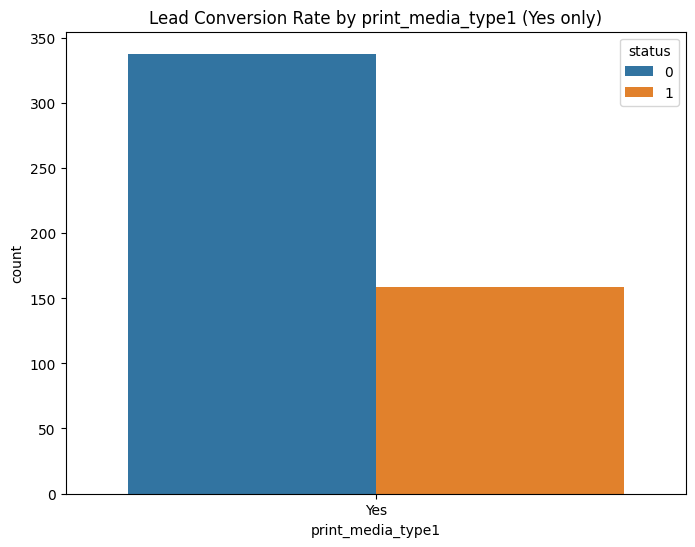

status                0     1
print_media_type2            
No                 3077  1302
Yes                 158    75 

status                 0      1
print_media_type2              
No                 70.27  29.73
Yes                67.81  32.19


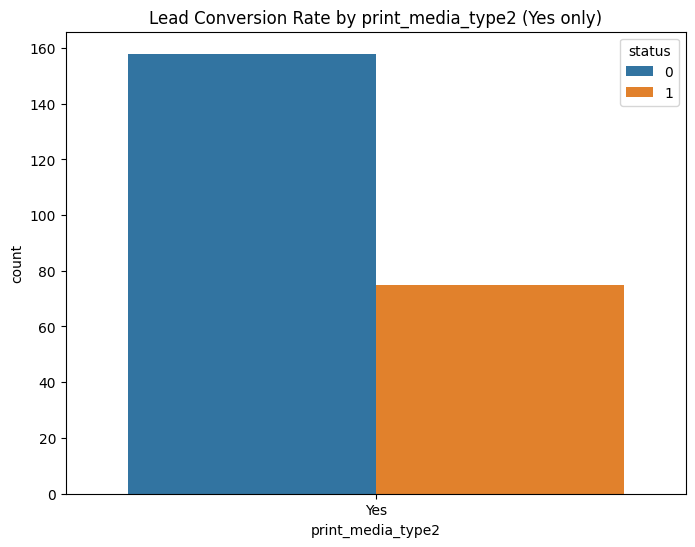

status            0     1
digital_media            
No             2876  1209
Yes             359   168 

status             0      1
digital_media              
No             70.40  29.60
Yes            68.12  31.88


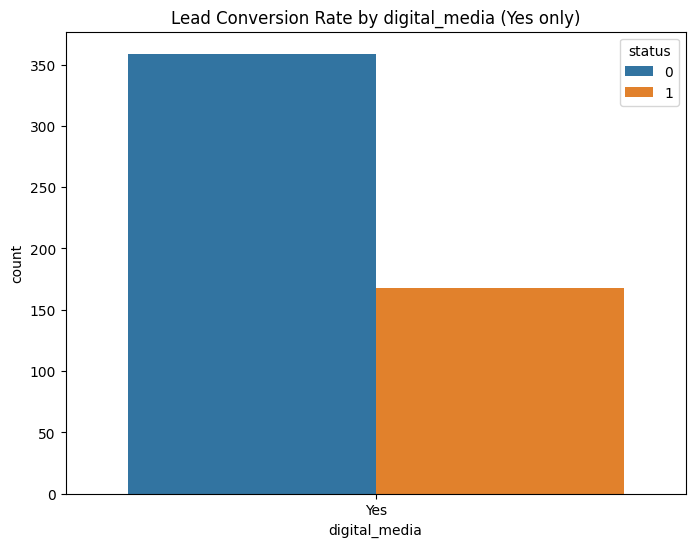

status                   0     1
educational_channels            
No                    2727  1180
Yes                    508   197 

status                    0      1
educational_channels              
No                    69.80  30.20
Yes                   72.06  27.94


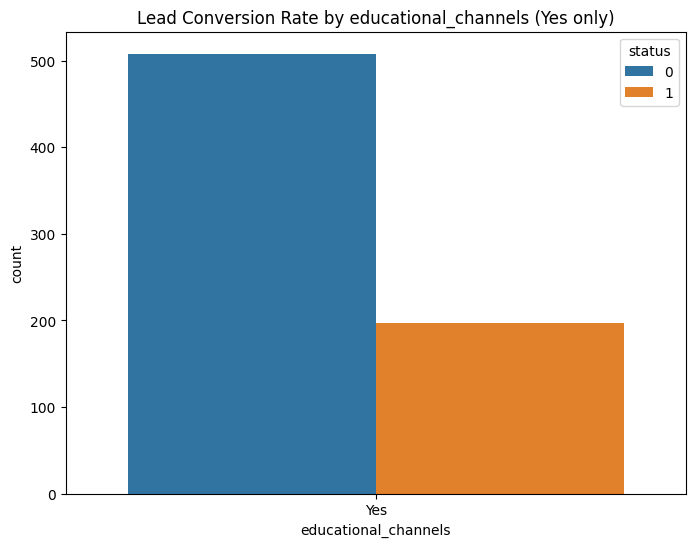

status       0     1
referral            
No        3205  1314
Yes         30    63 

status        0      1
referral              
No        70.92  29.08
Yes       32.26  67.74


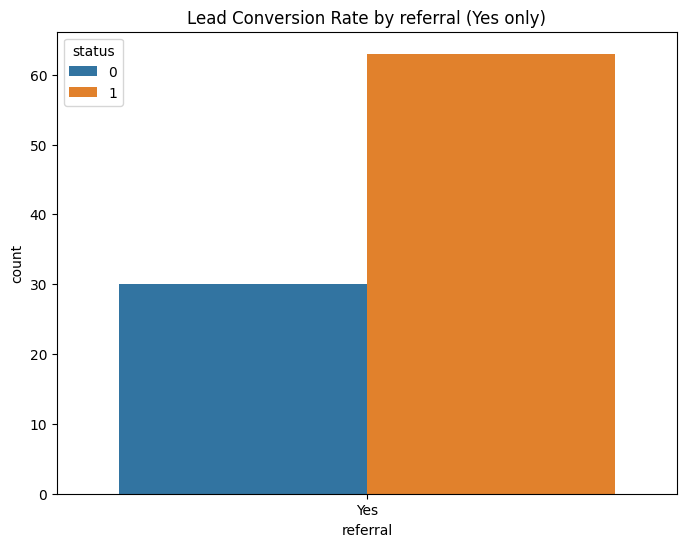

In [56]:
# Check the relationship between different channels and lead status
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for channel in channels:
    counts = unprocessed_df.groupby([channel, 'status']).size().unstack()
    print(counts, "\n")

    # Convert counts to percentages
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    percentages = percentages.round(2)
    print(percentages)

    # Show only 'yes' in the plot for better visualization (optional)
    plt.figure(figsize=(8, 6))
    sns.countplot(x=channel, hue='status', data=unprocessed_df[unprocessed_df[channel] == 'Yes'])
    plt.title(f'Lead Conversion Rate by {channel} (Yes only)')
    plt.show()

**Observations:**

- Leads generated through Print Media Type 1 converted at a rate of 31.99% with 497 total leads seeing the ad.

- Leads generated through Print Media Type 2 converted at a rate of 32.19%, with 233 total leads seeing the ad.

- Leads generated through Digital Media converted at a rate of 31.88%, with 527 total leads seeing the ad.

- Leads generated through Educational Channels converted at a rate of 27.94%, with 705 total leads learning about the program through these communities.

- Leads generated through referrals convert at the highest rate of 67.74%, with 93 total leads getting a refferal.

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

status                0    1
profile_completed           
High               1318  946
Low                  99    8
Medium             1818  423 

status                 0      1
profile_completed              
High               58.22  41.78
Low                92.52   7.48
Medium             81.12  18.88


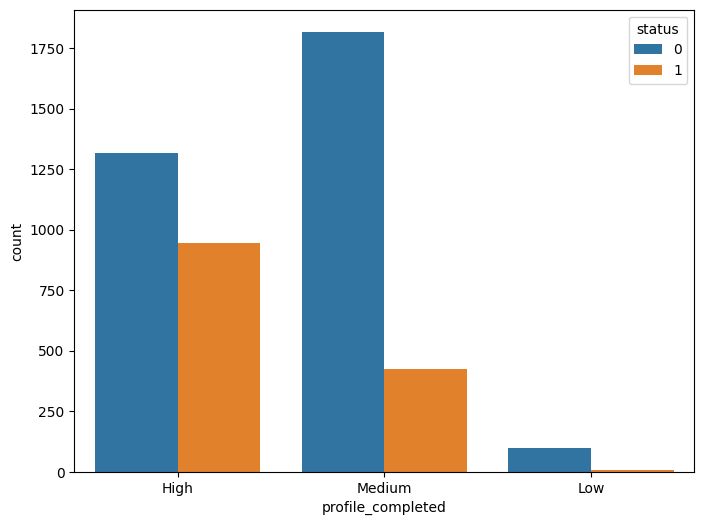

In [57]:
# Check the relationship between profile_completed and lead status
counts = unprocessed_df.groupby(['profile_completed', 'status']).size().unstack()
print(counts, "\n")

# Convert count into percentage values
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)
print(percentages)

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.countplot(x='profile_completed', hue='status', data=unprocessed_df)
plt.show()

**Observations:**

- 946 out of 2,264 prospects with mostly completed profiles converted to paid customers, resulting in a conversion rate of 41.78%.

- 423 out of 2,241 prospects with moderately completed profiles converted, with a conversion rate of 18.88%.

- Only 8 out of 107 leads with low completion profiles converted, yielding a conversion rate of 7.48%.

## Data Preprocessing

In [58]:
preprocessing_df = unprocessed_df.copy(deep=True)

#### Missing value treatment

In [59]:
# Check for missing values in the DataFrame
print(preprocessing_df.isnull().sum())

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


**Observations:**
There are no missing values, thus we do not need to augement the data.

#### Dropping Insignificant Variables

In [60]:
preprocessing_df_v1 = preprocessing_df.copy(deep=True)
preprocessing_df_v1 = preprocessing_df_v1.drop('ID', axis=1)
# Checking unique values in each column
print(preprocessing_df_v1.nunique())

age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


**Observations:**
All variables are numerical and categorical with each variables having multiple unique values. ID was dropped since the variable doesn't contribute to predictions.

#### Outlier detection and treatment

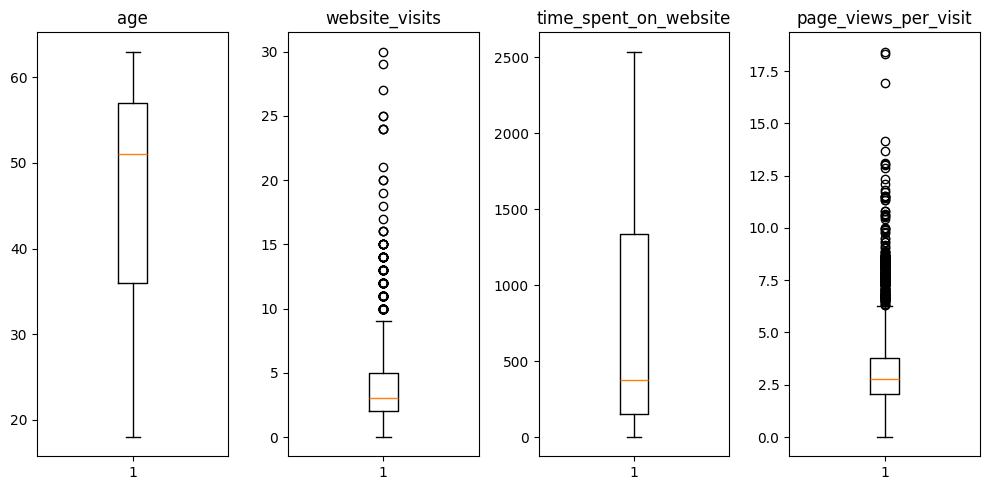

In [61]:
preprocessing_df_v2_before = preprocessing_df_v1.copy(deep=True)
numeric_columns = preprocessing_df_v2_before.select_dtypes(include=['number']).columns.drop('status')

plt.figure(figsize=(10, 5))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 4, i)
    plt.boxplot(preprocessing_df_v2_before[column])
    plt.tight_layout()
    plt.title(column)

plt.tight_layout()
plt.show()


**Observations:**
The only features that have outliers shown in the boxplot are "website_visits" and "page_views_per_visit".

In [62]:
preprocessing_df_v2_after = preprocessing_df_v2_before.copy(deep=True)
outlier_numeric_columns = ['website_visits', 'page_views_per_visit']

Q1 = preprocessing_df_v2_after[outlier_numeric_columns].quantile(0.25)
Q3 = preprocessing_df_v2_after[outlier_numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

for col in outlier_numeric_columns:
    preprocessing_df_v2_after[col] = preprocessing_df_v2_after[col].clip(lower=lower_whisker[col], upper=upper_whisker[col])


**Fix:** The outliers can be capped/clipped using the IQR method. This will replace data points in the lower whisker and in upper whisker values. The results are have been plotted below.


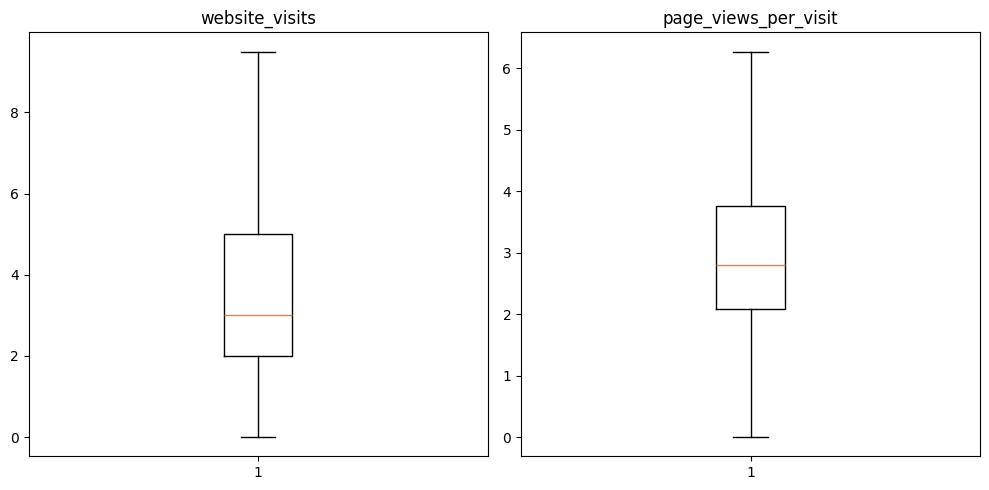

In [63]:
plt.figure(figsize=(10, 5))

for i, column in enumerate(outlier_numeric_columns, 1):
    plt.subplot(1, 2, i)
    plt.boxplot(preprocessing_df_v2_after[column])
    plt.tight_layout()
    plt.title(column)

plt.tight_layout()
plt.show()

#### Feature Engineering

In [64]:
preprocessing_df_v3 = preprocessing_df_v2_after.copy(deep=True)
# Define the columns to one-hot encode
columns_to_encode = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_features = encoder.fit_transform(preprocessing_df_v3[columns_to_encode])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded dataframe with the original dataframe (excluding the original encoded columns)
encoded_preprocessing_df_v4 = pd.concat([preprocessing_df_v3.drop(columns=columns_to_encode), encoded_df], axis=1).copy(deep=True)

# Display the first few rows of the updated dataframe
columns_order = ['age', 'current_occupation_Professional', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Mobile App',
       'first_interaction_Website', 'profile_completed_High',
       'profile_completed_Low', 'profile_completed_Medium','website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity_Email Activity', 'last_activity_Phone Activity',
       'last_activity_Website Activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status']

encoded_preprocessing_df_v4 = encoded_preprocessing_df_v4[columns_order]
print(encoded_preprocessing_df_v4.head())

   age  current_occupation_Professional  current_occupation_Student  \
0   57                              0.0                         0.0   
1   56                              1.0                         0.0   
2   52                              1.0                         0.0   
3   53                              0.0                         0.0   
4   23                              0.0                         1.0   

   current_occupation_Unemployed  first_interaction_Mobile App  \
0                            1.0                           0.0   
1                            0.0                           1.0   
2                            0.0                           0.0   
3                            1.0                           0.0   
4                            0.0                           0.0   

   first_interaction_Website  profile_completed_High  profile_completed_Low  \
0                        1.0                     1.0                    0.0   
1                 

**Augmentation:**
The code performs one-hot encoding on specified categorical columns of a DataFrame and replaces these columns with their encoded counterparts. It then reorganizes the final DataFrame and displays the first few rows for inspection.

In [65]:
encoded_preprocessing_df_v4['print_media_type1'] = encoded_preprocessing_df_v4['print_media_type1'].replace({'Yes': 1, 'No': 0})
encoded_preprocessing_df_v4['print_media_type2'] = encoded_preprocessing_df_v4['print_media_type2'].replace({'Yes': 1, 'No': 0})
encoded_preprocessing_df_v4['digital_media'] = encoded_preprocessing_df_v4['digital_media'].replace({'Yes': 1, 'No': 0})
encoded_preprocessing_df_v4['educational_channels'] = encoded_preprocessing_df_v4['educational_channels'].replace({'Yes': 1, 'No': 0})
encoded_preprocessing_df_v4['referral'] = encoded_preprocessing_df_v4['referral'].replace({'Yes': 1, 'No': 0})

print(encoded_preprocessing_df_v4.head())

   age  current_occupation_Professional  current_occupation_Student  \
0   57                              0.0                         0.0   
1   56                              1.0                         0.0   
2   52                              1.0                         0.0   
3   53                              0.0                         0.0   
4   23                              0.0                         1.0   

   current_occupation_Unemployed  first_interaction_Mobile App  \
0                            1.0                           0.0   
1                            0.0                           1.0   
2                            0.0                           0.0   
3                            1.0                           0.0   
4                            0.0                           0.0   

   first_interaction_Website  profile_completed_High  profile_completed_Low  \
0                        1.0                     1.0                    0.0   
1                 

**Augementation:**
The piece of code converts binary categorical values of 'Yes' and 'No' in several columns to numerical values of 1 and 0, respectively.

##### Eliminating Skewness of Variable


Processing column: age
Original Skewness for age: -0.7197874910014681
Yeo-Johnson Transformed Skewness for age: -0.37819921932403816


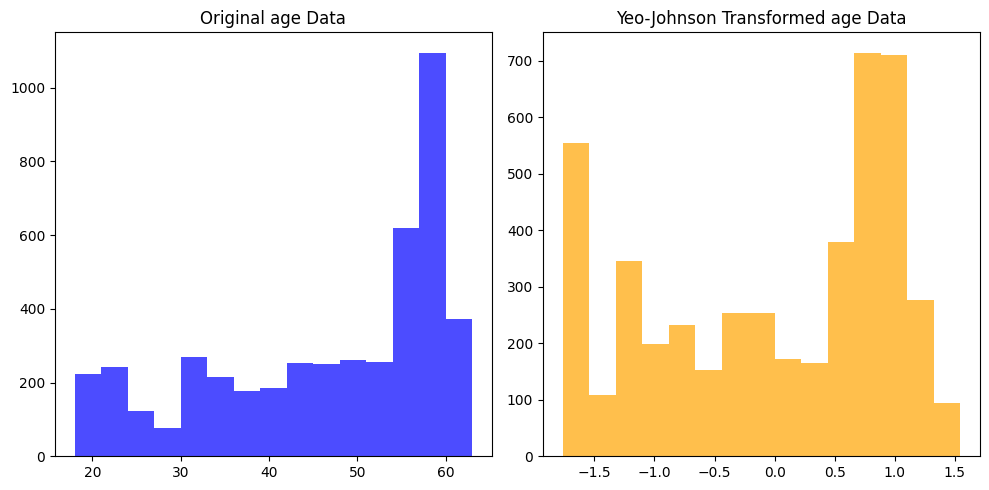


Processing column: website_visits
Original Skewness for website_visits: 0.8915656198587869
Yeo-Johnson Transformed Skewness for website_visits: -0.010965281709071914


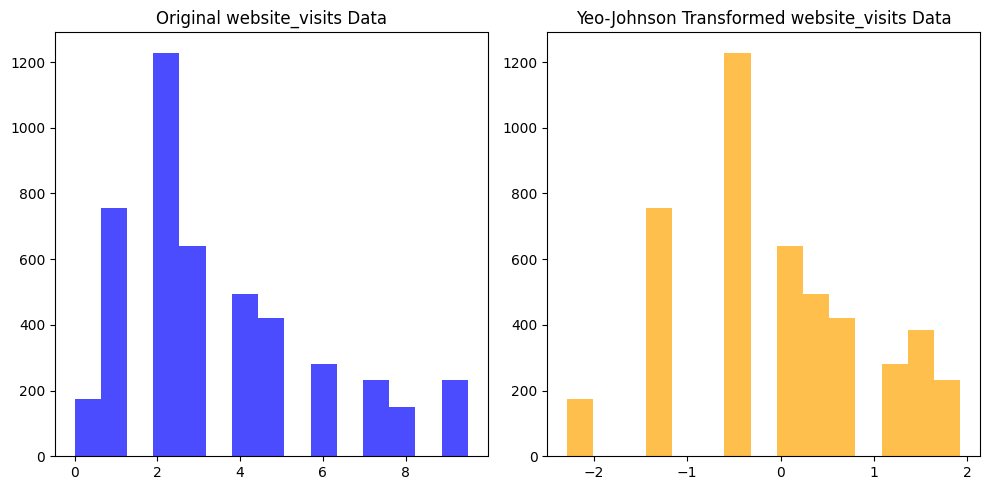


Processing column: time_spent_on_website
Original Skewness for time_spent_on_website: 0.9526183449197816
Yeo-Johnson Transformed Skewness for time_spent_on_website: -0.13408273658000042


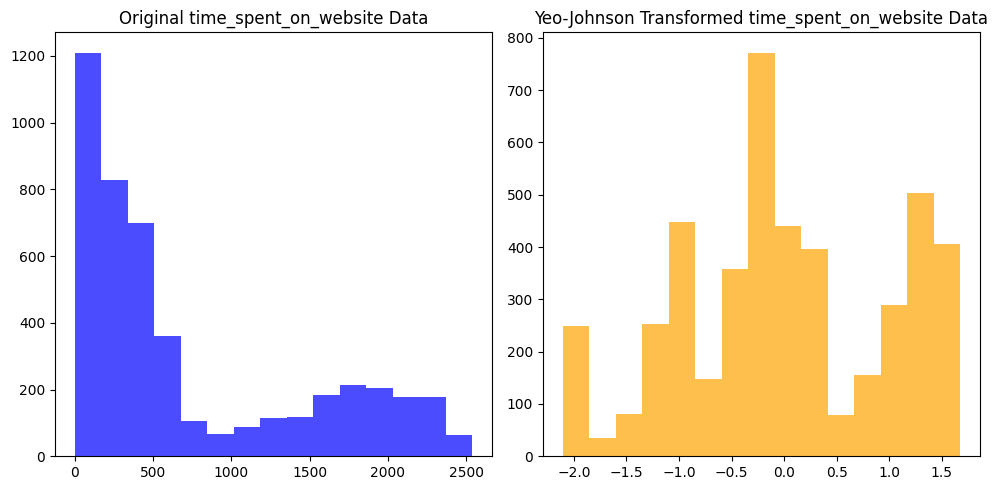


Processing column: page_views_per_visit
Original Skewness for page_views_per_visit: 0.20431654380840958
Yeo-Johnson Transformed Skewness for page_views_per_visit: -0.06491174236770136


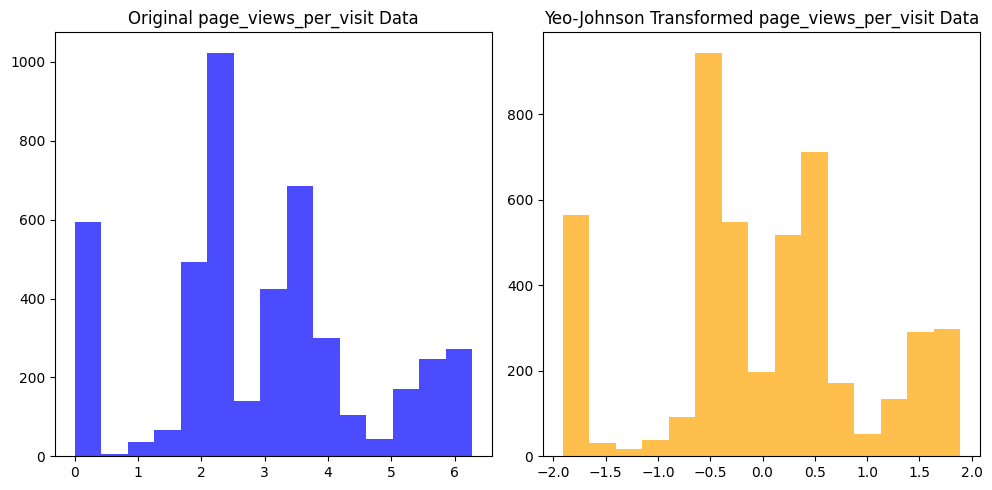

        age  current_occupation_Professional  current_occupation_Student  \
0  0.858086                              0.0                         0.0   
1  0.751443                              1.0                         0.0   
2  0.346540                              1.0                         0.0   
3  0.444528                              0.0                         0.0   
4 -1.594141                              0.0                         1.0   

   current_occupation_Unemployed  first_interaction_Mobile App  \
0                            1.0                           0.0   
1                            0.0                           1.0   
2                            0.0                           0.0   
3                            1.0                           0.0   
4                            0.0                           0.0   

   first_interaction_Website  profile_completed_High  profile_completed_Low  \
0                        1.0                     1.0               

In [66]:
preprocessing_df_v5 = encoded_preprocessing_df_v4.copy(deep=True)

## List of columns to be transformed
columns_to_transform = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Loop through each column, apply the transformation, and plot
for column in columns_to_transform:
    print(f'\nProcessing column: {column}')

    # Calculate original skewness
    original_skew = skew(preprocessing_df_v5[column])
    print(f"Original Skewness for {column}:", original_skew)

    # Apply Yeo-Johnson transformation
    pt = PowerTransformer(method='yeo-johnson')
    preprocessing_df_v5[f'{column}_yeo_johnson'] = pt.fit_transform(preprocessing_df_v5[[column]])

    # Calculate skewness after transformation
    yj_skew = skew(preprocessing_df_v5[f'{column}_yeo_johnson'])
    print(f"Yeo-Johnson Transformed Skewness for {column}:", yj_skew)

    # Plot original and transformed data
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(preprocessing_df_v5[column], bins=15, color='blue', alpha=0.7)
    plt.title(f'Original {column} Data')

    plt.subplot(1, 2, 2)
    plt.hist(preprocessing_df_v5[f'{column}_yeo_johnson'], bins=15, color='orange', alpha=0.7)
    plt.title(f'Yeo-Johnson Transformed {column} Data')

    plt.tight_layout()
    plt.show()

    preprocessing_df_v5[f'{column}'] = preprocessing_df_v5[f'{column}_yeo_johnson']
    preprocessing_df_v5 = preprocessing_df_v5.drop(f'{column}_yeo_johnson', axis=1)

print(preprocessing_df_v5.head())



**Augmentation:**
The code addresses skewness in numerical columns by applying the Yeo-Johnson transformation, which adjusts the data distribution to be more normal-like.

## EDA


In [67]:
processed_df = preprocessing_df_v5.copy(deep=True)

In [68]:
print(processed_df.describe())

                age  current_occupation_Professional  \
count  4.612000e+03                      4612.000000   
mean   1.413536e-16                         0.567216   
std    1.000108e+00                         0.495515   
min   -1.762256e+00                         0.000000   
25%   -9.344917e-01                         0.000000   
50%    2.506972e-01                         1.000000   
75%    8.580863e-01                         1.000000   
max    1.543958e+00                         1.000000   

       current_occupation_Student  current_occupation_Unemployed  \
count                 4612.000000                    4612.000000   
mean                     0.120338                       0.312446   
std                      0.325392                       0.463541   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'current_occupation_Professional'}>,
        <Axes: title={'center': 'current_occupation_Student'}>,
        <Axes: title={'center': 'current_occupation_Unemployed'}>,
        <Axes: title={'center': 'first_interaction_Mobile App'}>],
       [<Axes: title={'center': 'first_interaction_Website'}>,
        <Axes: title={'center': 'profile_completed_High'}>,
        <Axes: title={'center': 'profile_completed_Low'}>,
        <Axes: title={'center': 'profile_completed_Medium'}>,
        <Axes: title={'center': 'website_visits'}>],
       [<Axes: title={'center': 'time_spent_on_website'}>,
        <Axes: title={'center': 'page_views_per_visit'}>,
        <Axes: title={'center': 'last_activity_Email Activity'}>,
        <Axes: title={'center': 'last_activity_Phone Activity'}>,
        <Axes: title={'center': 'last_activity_Website Activity'}>],
       [<Axes: title={'center': 'print_media_type1'}>,
        <Axes: title={

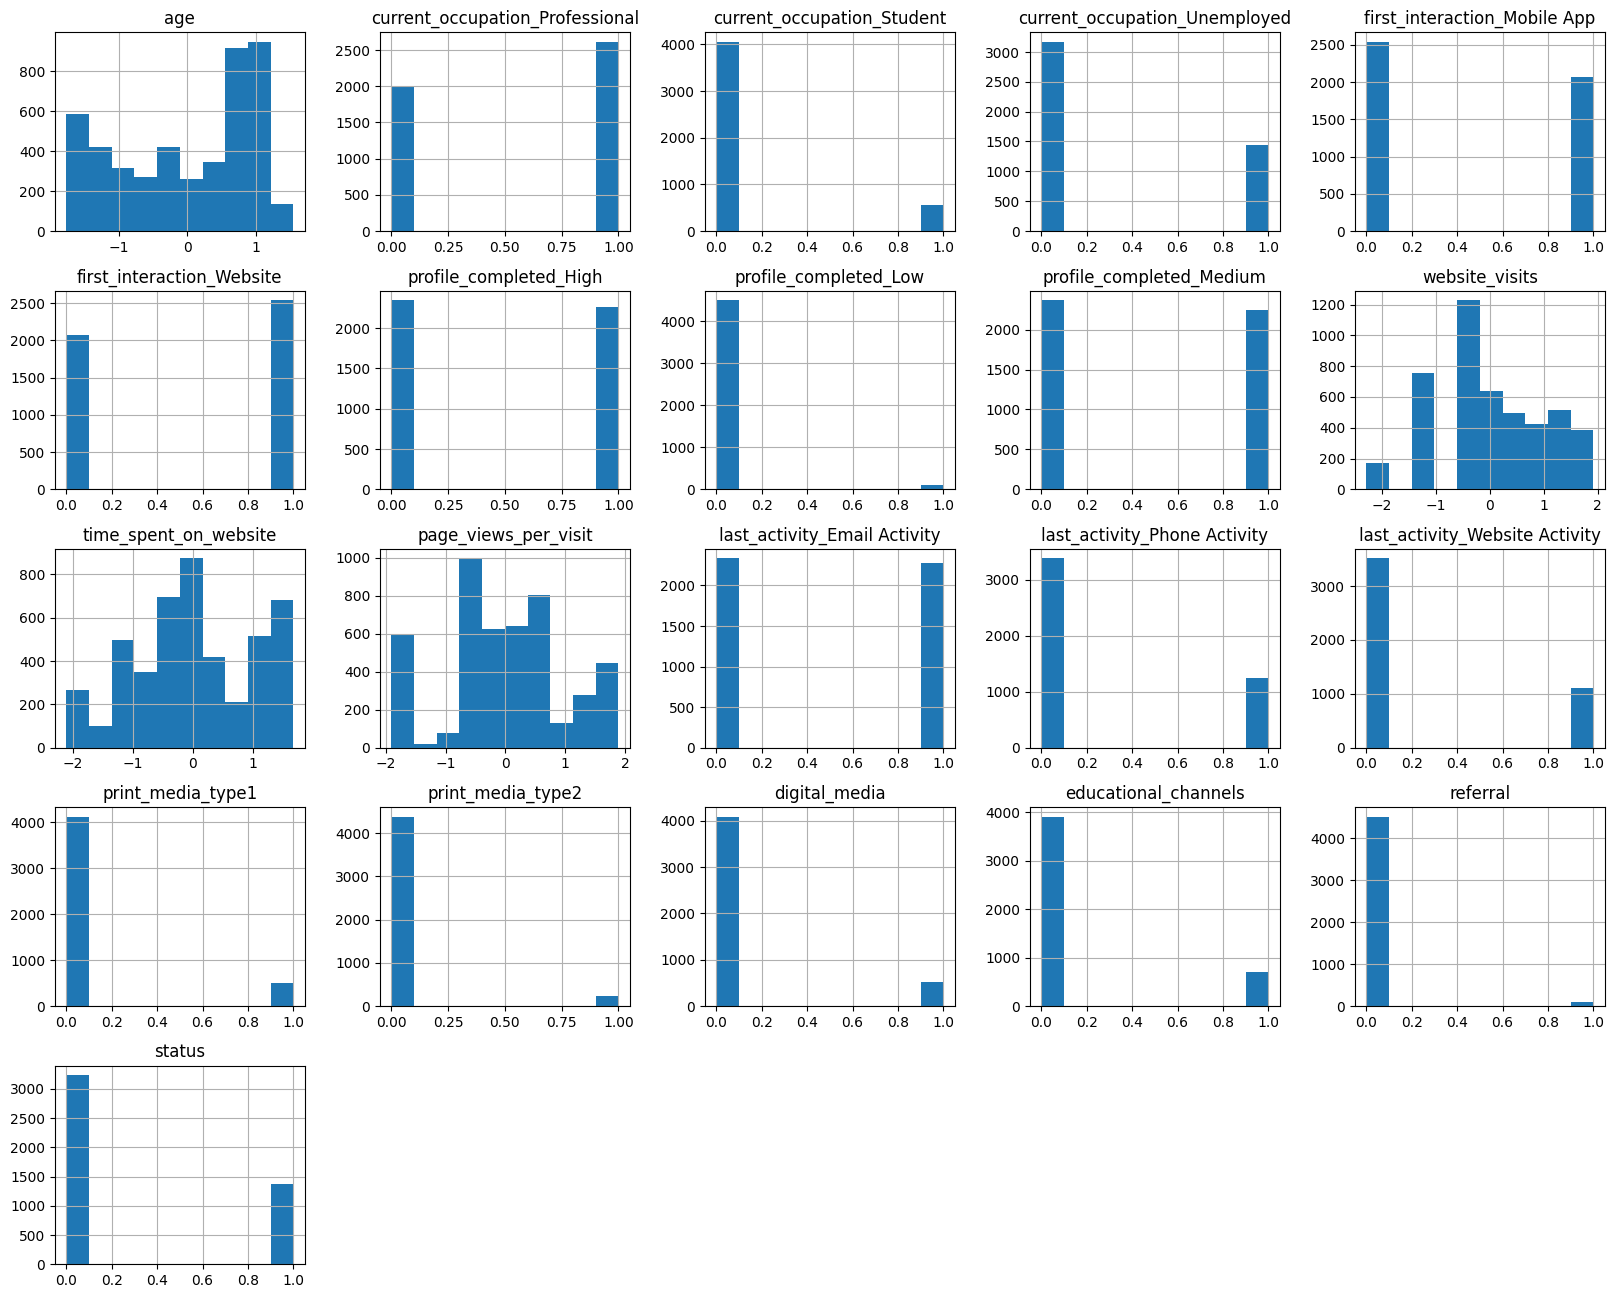

In [69]:
processed_df.hist(figsize=(20, 16))


In [70]:
print(processed_df.isnull().sum())

age                                0
current_occupation_Professional    0
current_occupation_Student         0
current_occupation_Unemployed      0
first_interaction_Mobile App       0
first_interaction_Website          0
profile_completed_High             0
profile_completed_Low              0
profile_completed_Medium           0
website_visits                     0
time_spent_on_website              0
page_views_per_visit               0
last_activity_Email Activity       0
last_activity_Phone Activity       0
last_activity_Website Activity     0
print_media_type1                  0
print_media_type2                  0
digital_media                      0
educational_channels               0
referral                           0
status                             0
dtype: int64


**EDA Results:**

- The dataset's categorical variables have been encoded into numerical form, and all numerical values have been normalized. This preprocessing prepares the data for efficient training and testing of machine learning models.

## Data Split

In [71]:
# Separating target variable and other variables
Y=processed_df['status'].copy(deep=True)
X=processed_df.drop('status',axis=1).copy(deep=True)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

## Data Scale

In [72]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [73]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [74]:
# Building decision tree model
dt = DecisionTreeClassifier(random_state = 1)

In [75]:
# Fitting decision tree model
dt.fit(X_train_scaled, y_train)

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [105]:
# COMMENTED CODE TO GET THE BEST PERFORMING PARAMETERS

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [10, 20, 30],
#     'min_samples_leaf': [1, 2, 3]}

# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# print("Best hyperparameters:", best_params)

# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test set accuracy:", accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



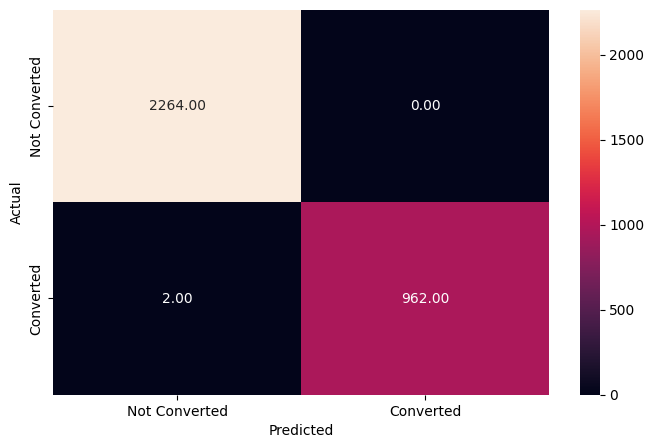

In [76]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train_scaled)

metrics_score(y_train, y_train_pred_dt)

**Performance on the Training Data**

- High accuracy and metrics on training data indicate that the model captures the patterns well.
- Perfect scores suggest potential overfitting, where the model learns noise and anomalies, resulting in lack of generalization.

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       971
           1       0.67      0.69      0.68       413

    accuracy                           0.80      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.80      0.81      1384



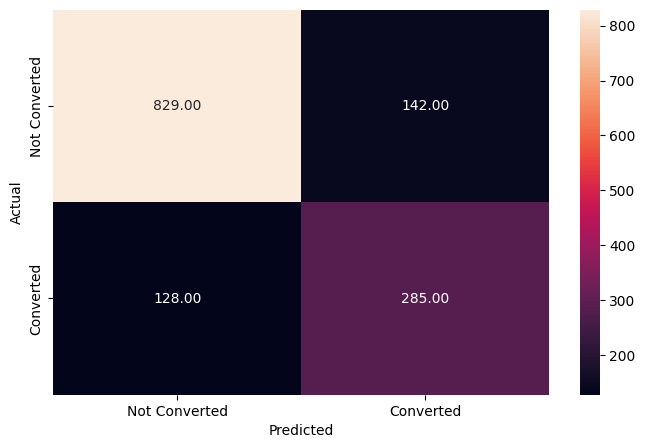

In [77]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test_scaled)

metrics_score(y_test, y_test_pred_dt)

**Performance on the Test Data**

- Test data performance indicates how well the model generalizes to unseen data.
- Some drop from training to test performance is normal, but should be minimal to avoid overfitting concerns.
- Consistent precision and recall across classes are ideal, especially with imbalanced data.



## Do we need to prune the tree?

In [78]:
class_counts = Y.value_counts()
total_samples = len(Y)
class_frequencies = class_counts / total_samples
class_frequencies

,count
status,
0,0.701431
1,0.298569


In [79]:
# Building decision tree model
pdt = DecisionTreeClassifier(class_weight={0: 1.1, 1: 1}, criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=10, random_state = 1)

In [80]:
# Fitting decision tree model
pdt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 1.1, 1: 1}, max_depth=5,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=1)

In [81]:
pdt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {0: 1.1, 1: 1},
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2264
           1       0.80      0.74      0.77       964

    accuracy                           0.87      3228
   macro avg       0.85      0.83      0.84      3228
weighted avg       0.87      0.87      0.87      3228



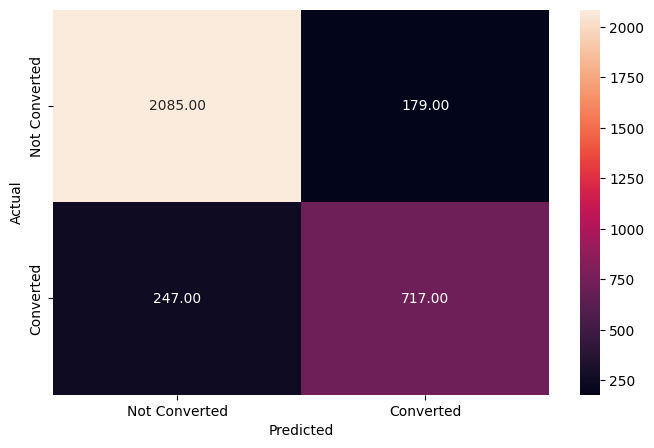

In [82]:
# Checking performance on the training dataset
y_train_pred_pdt = pdt.predict(X_train_scaled)

metrics_score(y_train, y_train_pred_pdt)

**Performance on the Training Data**

- The model demonstrates good accuracy and balanced metrics, indicating effective capture of patterns in the training data.
- There are no signs of extreme performance (i.e., perfect scores), suggesting that overfitting is likely minimized.



              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



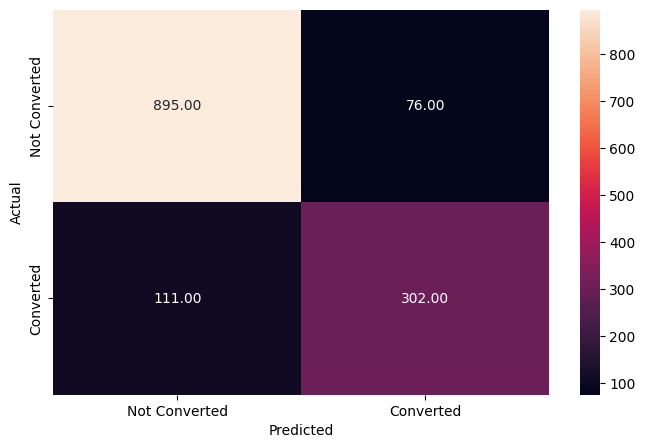

In [83]:
# Checking performance on the test dataset
y_test_pred_pdt = pdt.predict(X_test_scaled)

metrics_score(y_test, y_test_pred_pdt)

**Performance on the Test Data**

- The test data performance aligns well with the training data, showcasing the model's ability to generalize to new and unseen data effectively.
- Minimal performance drop between training and test datasets indicates that overfitting concerns are well-addressed.
- The metrics show consistent precision and recall across classes, indicating fair handling of both classes, including the imbalanced aspects.




<Axes: xlabel='Importance', ylabel='None'>

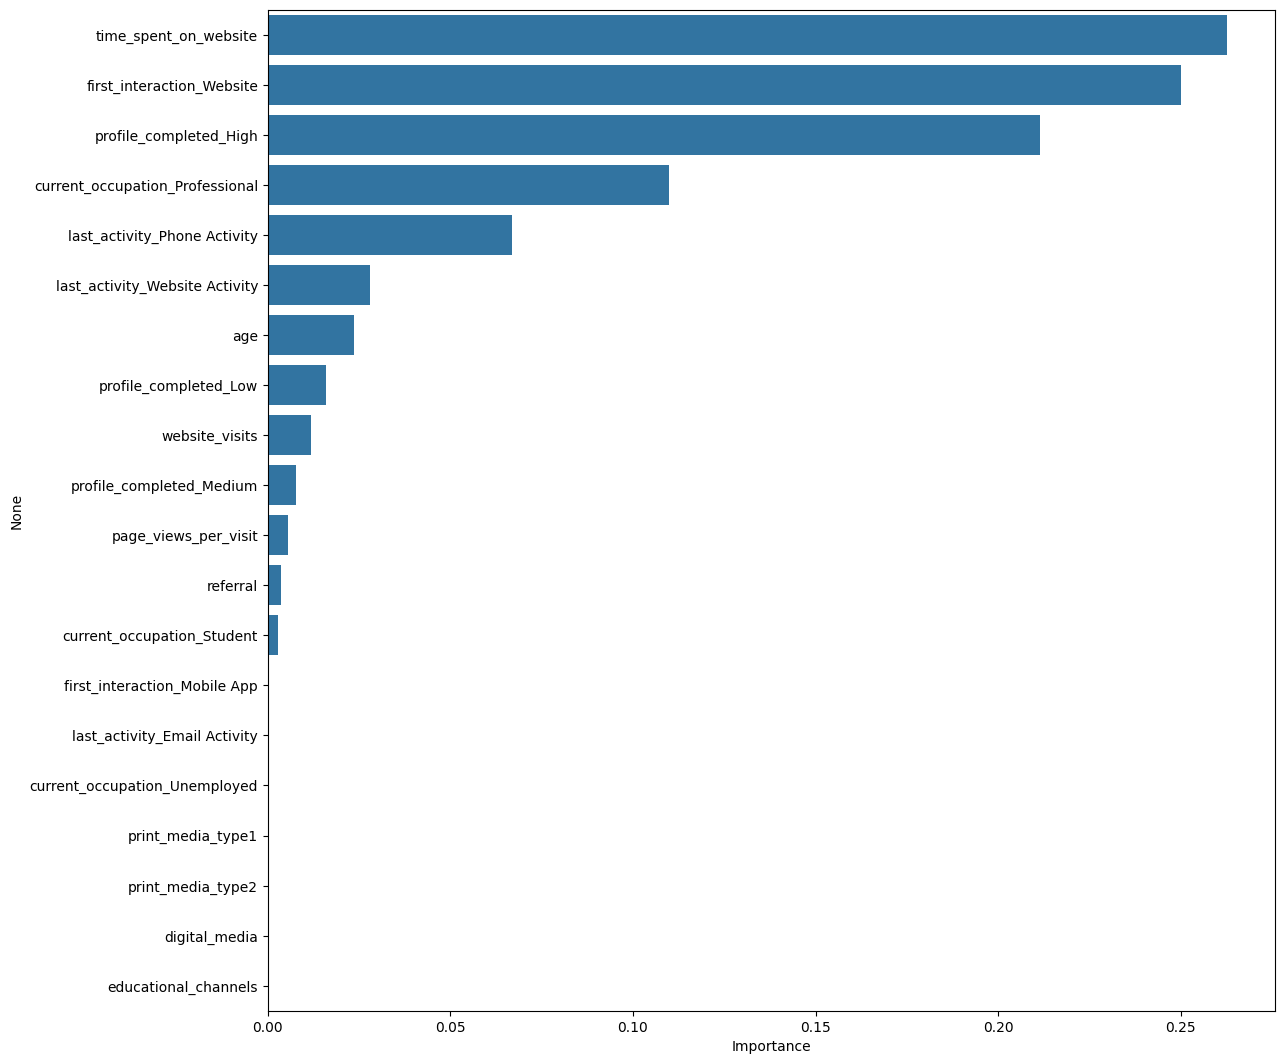

In [84]:
importances = pdt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Feature Importance**


1. Top Features:
  - `time_spent_on_website` is the most important feature, indicating that how much time a user spends on the website is a significant predictor for the model's outcome.
  - `first_interaction_Website` ranks second, suggesting that users who first interact through the website might have distinct behavior or outcomes.
  - `profile_completed_High` shows that users with a highly completed profile are likely more engaged or valuable.
  - `current_occupation_Professional` is another important feature, highlighting the occupation's influence on the model's predictions.

2. Moderately Important:
  - `last_activity_Phone Activity` and `last_activity_Website Activity` emphasize the relevance of recent user activity in predicting outcomes.
  - `age` and `profile_completed_Low` have moderate importance, likely reflecting demographic and engagement characteristics.
3. Less Important:
  - Features like `page_views_per_visit`, `referral`, and `current_occupation_Student` have minimal impact.
4. Negligible:
 - Attributes such as `digital_media`, `educational_channels`, and `print_media_type2` hold little predictive value.

## Building a Random Forest model

In [86]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

In [87]:
rf_estimator.fit(X_train_scaled, y_train)

rf_estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [104]:
# COMMENTED CODE TO GET BEST PARAMETERS

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf_estimator, param_grid=param_grid,
#                            cv=5, scoring='accuracy',
#                            verbose=2, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Score:", grid_search.best_score_)


# # Get the best model
# best_model = grid_search.best_estimator_

# # Make predictions
# y_pred = best_model.predict(X_test)

# # Evaluate performance
# print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



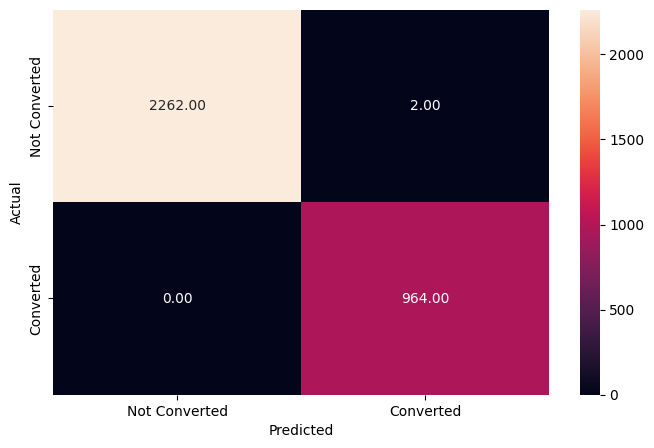

In [88]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_rf)

**Performance on the Training Data**

- The Random Forest classifier shows perfect scores on the training data, indicating that it captures the patterns extremely well.
- These perfect scores are indicative of overfitting, where the model might have learned both the patterns and noise from the training data, leading to a lack of generalization.




              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.78      0.71      0.75       413

    accuracy                           0.86      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384



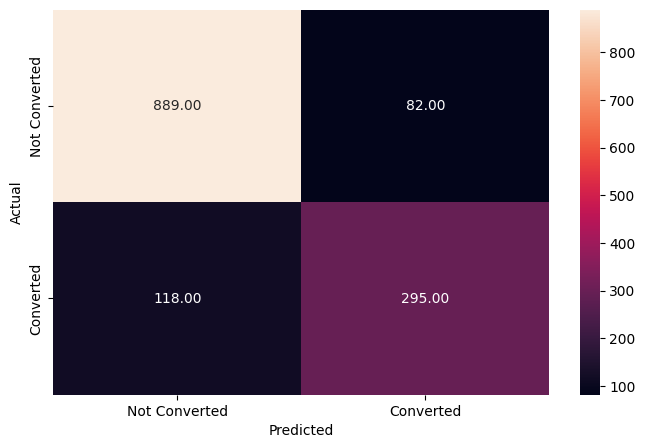

In [89]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_rf)

**Performance on the Test Data**

- Test data performance shows reduced precision, recall, and F1-score compared to the training data, especially for Class 1, indicating the model's generalization capability is somewhat affected by overfitting.
- There is a noticeable performance drop from training to test data, particularly affecting recall and F1-score for Class 1, which suggests overfitting concerns and a need for tuning.
- Precision and recall for Class 0 are higher compared to Class 1, indicating better performance for the majority class and highlighting the need for enhancing minority class predictions.


## Do we need to prune the tree?

In [99]:
# Fitting the Random Forest classifier on the training data
prf_estimator = RandomForestClassifier(class_weight='balanced', bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state = 1)

In [100]:
prf_estimator.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2264
           1       0.83      0.91      0.87       964

    accuracy                           0.92      3228
   macro avg       0.90      0.92      0.91      3228
weighted avg       0.92      0.92      0.92      3228



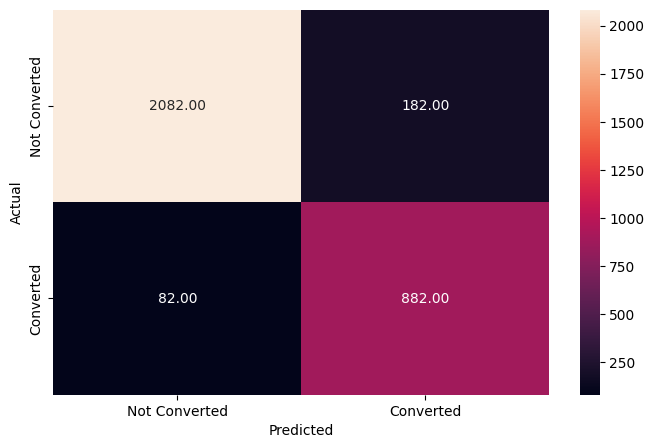

In [101]:
# Checking performance on the training data
y_pred_train_prf = prf_estimator.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_prf)

**Performance on the Training Data**

- The Random Forest classifier demonstrates strong performance on the training data, with high precision, recall, and F1-scores. Class 0 has slightly better precision, while Class 1 shows a good recall.
- The performance is not perfect, indicating that the model maintains a balance between capturing underlying patterns and avoiding overfitting. The chosen parameters seem to manage complexity effectively.



              precision    recall  f1-score   support

           0       0.91      0.88      0.90       971
           1       0.74      0.79      0.77       413

    accuracy                           0.86      1384
   macro avg       0.83      0.84      0.83      1384
weighted avg       0.86      0.86      0.86      1384



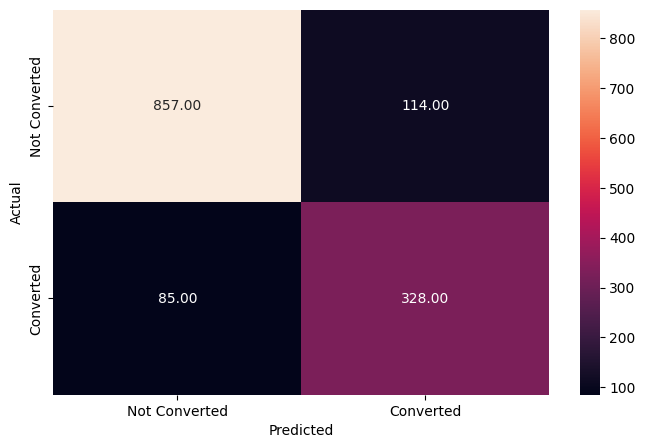

In [106]:
# Checking performance on the testing data
y_pred_test_prf = prf_estimator.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_prf)

**Performance on the Test Data**

- The test data results show good generalization with a slight reduction in metrics compared to the training data, which is expected and indicates effective model learning.
- The drop in performance is within acceptable limits, reflecting a reasonable trade-off between fitting the training data and maintaining generalization.
- Precision and recall are reasonably consistent, with Class 1 achieving higher recall compared to its precision on the test data. This indicates the model's ability to capture the minority class better than before, due to `class_weight='balanced` and other parameter settings.


<Axes: xlabel='Importance', ylabel='None'>

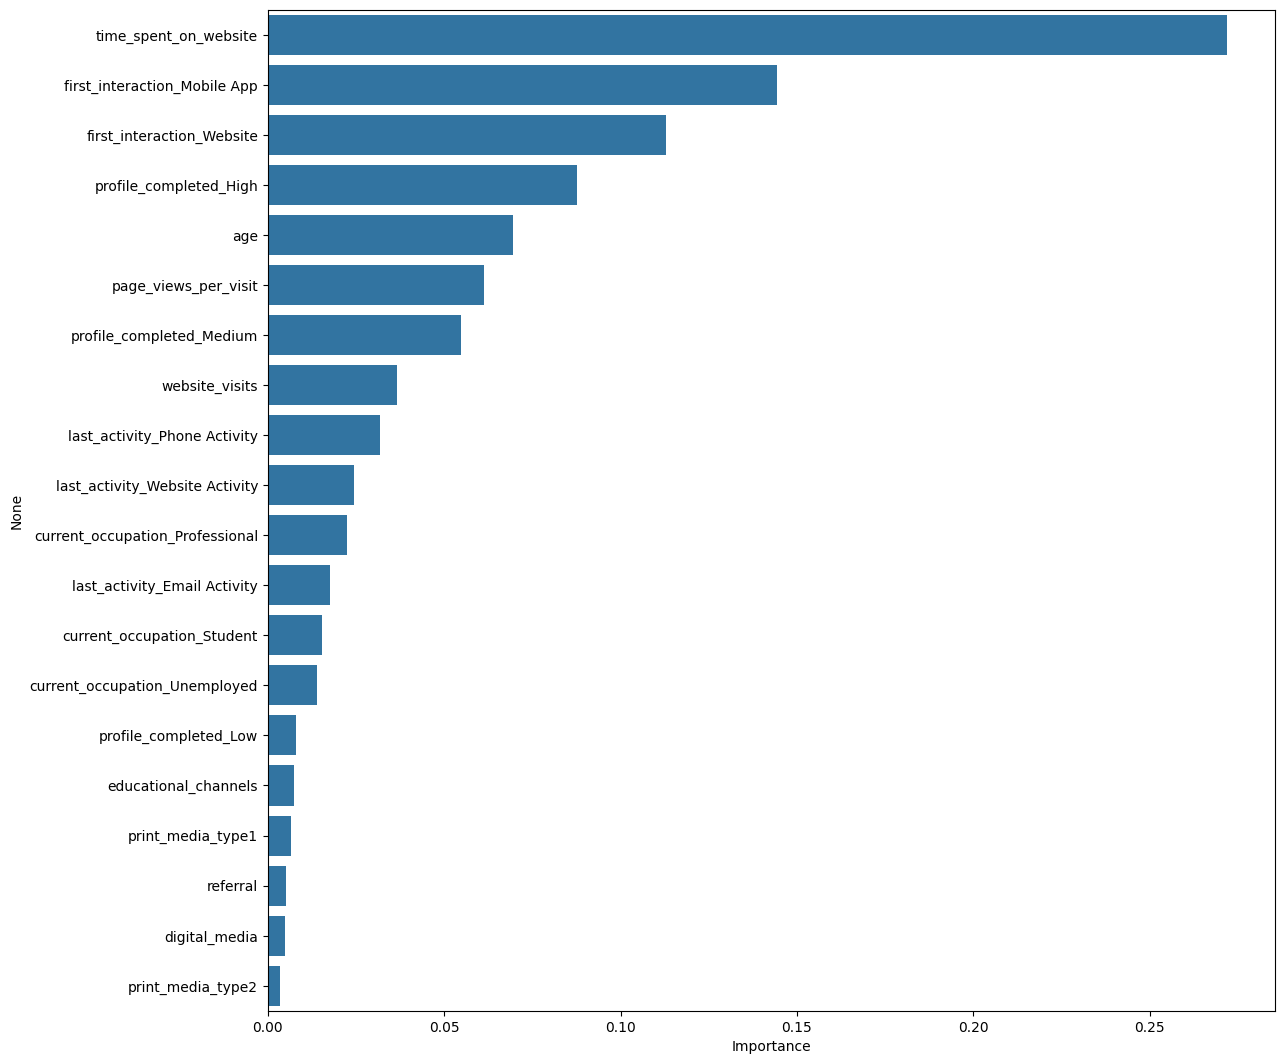

In [103]:
importances = prf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Feature Importance**
1. Top Features:
   - `time_spent_on_website` is the most important feature, indicating that how much time a user spends on the website is a significant predictor for the model's outcome.
   - `first_interaction_Website` ranks second, suggesting that users who first interact through the website might have distinct behavior or outcomes.
   - `profile_completed_High` shows that users with a highly completed profile are likely more engaged or valuable.
   - `current_occupation_Professional` is another important feature, highlighting the occupation's influence on the model's predictions.

2. Moderately Important Features:
   - `last_activity_Phone Activity` and `last_activity_Website Activity` emphasize the relevance of recent user activity in predicting outcomes.
   - `age` and `profile_completed_Low` have moderate importance, likely reflecting demographic and engagement characteristics.

3. Less Important Features:
   - Features such as `page_views_per_visit`, `referral`, and `current_occupation_Student` have lower importance.

4. Negligible Importance:
   - Features like `digital_media`, `educational_channels`, and `print_media_type2` contribute minimally to the model.


## Actionable Insights and Recommendations

### Conclusion and Key Takeaways:  

1. Key Predictive Features:
   - `time_spent_on_website` is the most critical predictor, highlighting the importance of engaging users on the platform.  
   - `first_interaction_Mobile App` and `first_interaction_Website` underscore the influence of initial user interaction channels.  
   - `profile_completed_High` and `age` suggest that a complete profile and demographic factors drive outcomes significantly.  

2. Moderately Important Factors:  
   - User engagement metrics like `page_views_per_visit`, `website_visits`, and recent activity (e.g., `last_activity_Phone Activity`) moderately influence predictions.  
   - Demographic nuances, such as `current_occupation_Professional`, play a secondary role.  

3. Less Influential or Negligible Features:  
   - Features like `digital_media`, `educational_channels`, and `print_media_type2` contribute minimally, signaling limited relevance to the model.  

---

### Recommendations for Business Actions:  

1. Enhance Website Engagement:  
   - Focus on increasing **time spent on the website** through engaging content, intuitive navigation, and personalized recommendations.  
   - Prioritize optimizing the website experience for users who first interact via the website.  

2. **Leverage Mobile App Onboarding:**  
   - Enhance the mobile app onboarding process to capture and retain users with higher engagement potential.  

3. **Encourage Profile Completion:**  
   - Incentivize users to complete their profiles by offering benefits such as personalized services or discounts.  

4. **Target Specific User Groups:**  
   - Develop tailored marketing strategies for professionals, as `current_occupation_Professional` suggests this segment is valuable.  
   - Design age-specific campaigns, especially targeting demographics that are more active on the platform.  

5. **Refine Feature Focus:**  
   - De-prioritize investments in **digital media** and **print media** channels that contribute minimally to outcomes. Instead, reallocate resources to higher-impact strategies like website engagement and app development.  

6. **Continuous Monitoring and Iteration:**  
   - Regularly review feature importance and retrain models to account for evolving user behavior and trends.  
   - Consider excluding negligible features from future models to simplify and improve efficiency without sacrificing predictive power.  